In [1]:
import pandas as pd
import numpy as np
import pyreadr
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
samples = pd.read_csv('../key_files/merged_sample_table.csv')[['site', 'plot', 'generation', 'total_flower_counts']]

samples = samples.groupby(['site', 'plot', 'generation'])['total_flower_counts'].sum().reset_index()

samples['min_perc'] = 1/samples['total_flower_counts']

samples['code'] = samples['site'].astype(str) + '_'  + samples['generation'].astype(str) + '_' + samples['plot'].astype(str) 

ecotype_freq = pd.read_csv('../key_files/merged_ecotype_frequency.txt',sep = '\t')

climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

for i in ecotype_freq.columns:
    min_perc = samples[samples['code'] == i]['min_perc'].values[0]
    ecotype_freq.loc[ecotype_freq[i] < min_perc, i] = np.nan

In [9]:
unique_ecotypes.columns = ['sample', 'unique_ecotypes']

In [10]:
unique_ecotypes['site'] = unique_ecotypes['sample'].str.split('_').str[0].astype(int)

unique_ecotypes['site_plot'] = unique_ecotypes['sample'].str.split('_').str[0] + '_' + unique_ecotypes['sample'].str.split('_').str[2]
unique_ecotypes['generation'] = unique_ecotypes['sample'].str.split('_').str[1]

In [12]:
unique_ecotypes.to_csv('../key_files/unique_ecotypes.csv', index=None)

In [10]:
bio1 = unique_ecotypes.merge(climate, on = 'site')[['site_plot', 'bio1']]
bio1 = bio1.drop_duplicates().set_index('site_plot')

In [11]:
unique_ecotypes_pivot = unique_ecotypes.pivot_table(index = 'site_plot', columns = 'generation', values = 'unique_ecotypes')

In [12]:
# Merge the two dataframes on the index
merged_df = unique_ecotypes_pivot.join(bio1)

# Group by temperature (bio1)
bio1_groups = merged_df.groupby('bio1')

In [13]:
climate_dict = climate.set_index('bio1')['site'].to_dict()
colors = ['#2aad2a' , '#2aad2a', '#208420'] # 

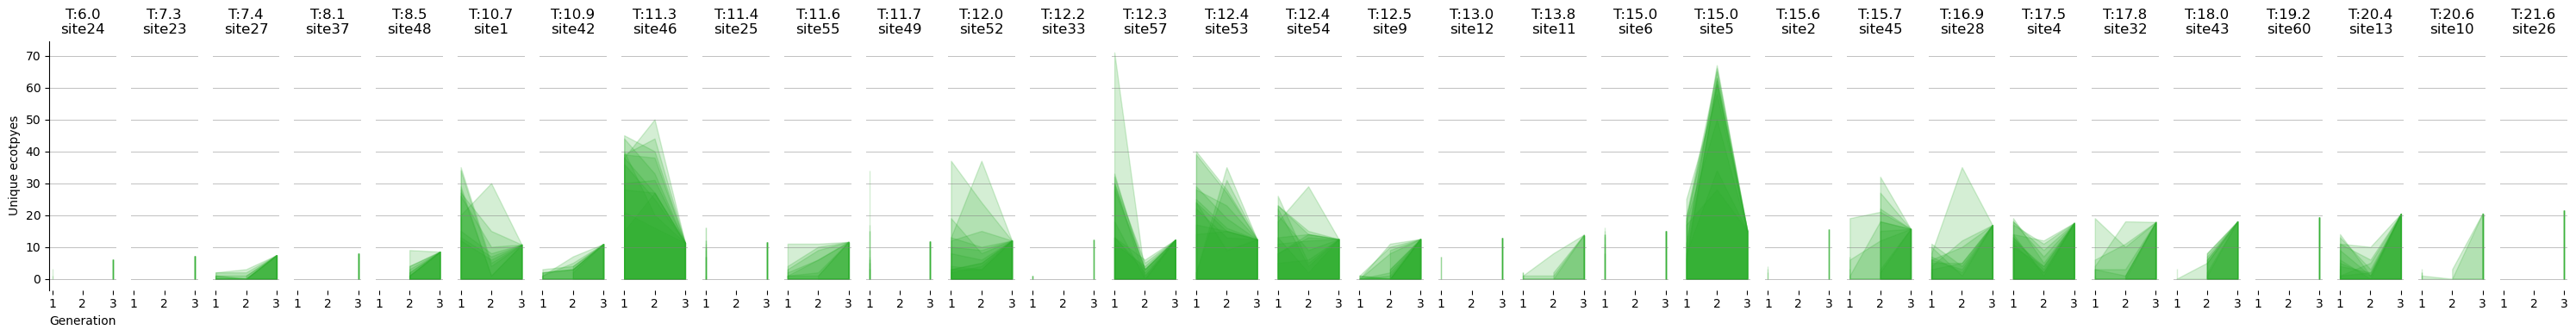

In [14]:
import matplotlib.pyplot as plt

# Set the number of columns for the plot grid
n_cols = len(bio1_groups)
n_rows = 1

# Create subplots with multiple columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes if we have multiple rows/columns
axes = axes.flatten()



# Plot each group of samples in a different subplot with color-filled areas
for i, (bio1_val, group) in enumerate(bio1_groups):
    for _, row in group.iterrows():
        x = [1, 2, 3]
        y = row[[1, 2, 3]].astype(float).values
        
        # Fill the area representing the population size
        axes[i].fill_between(x, 0, y, color=colors[0], alpha=0.2, label='Population size')

    # Set the title and labels for each subplot
    axes[i].set_title(f'T:{round(bio1_val, 1)}\nsite{int(climate_dict[bio1_val])}')
    axes[i].set_xlabel('Generation')
    axes[i].grid(axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

    # For subplots other than the first, remove y-axis labels and ticks
    if i > 0:
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].set_xlabel('') 
        axes[i].tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
    
    # Remove all spines (rectangles around the plots)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(i == 0)  # Only show the left spine for the first plot

# Set y-axis label and ticks only for the first plot
axes[0].set_ylabel('Unique ecotpyes')
plt.subplots_adjust(wspace=0, hspace=0)  # Shrink space between subplots

#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, zorder=0)
plt.savefig('unique_ecotypes_sites_time.png')

plt.tight_layout()

# Display the plot
plt.show()

In [151]:
pop = pd.read_csv('../key_files/merged_sample_table.csv')[['site', 'plot', 'generation', 'total_flower_counts']]

In [152]:
climate = pd.read_csv('../key_files/bioclimvars_experimental_sites_era5.csv')[['site', 'bio1']]

In [153]:
pop = pop.merge(climate, on ='site')

In [154]:
pop['site_plot'] = pop['site'].astype(str) + '_' + pop['plot'].astype(str)

In [155]:
bio1 = pop[['site_plot', 'bio1']]

In [156]:
bio1 = bio1.drop_duplicates().set_index('site_plot')

In [157]:
pop_pivot = pop.pivot_table(index = 'site_plot', columns = 'generation', values = 'total_flower_counts')

In [158]:
pop_pivot = pop_pivot[[1,2,3]]

In [159]:
pop_pivot.columns = [1,2,3]

In [162]:
unique_ecotypes_pivot.columns = [1,2,3]

In [163]:
unique_ecotype_over_pop_size = unique_ecotypes_pivot.div(pop_pivot)

In [164]:
# Merge the two dataframes on the index
merged_df = unique_ecotype_over_pop_size.join(bio1)

# Group by temperature (bio1)
bio1_groups = merged_df.groupby('bio1')

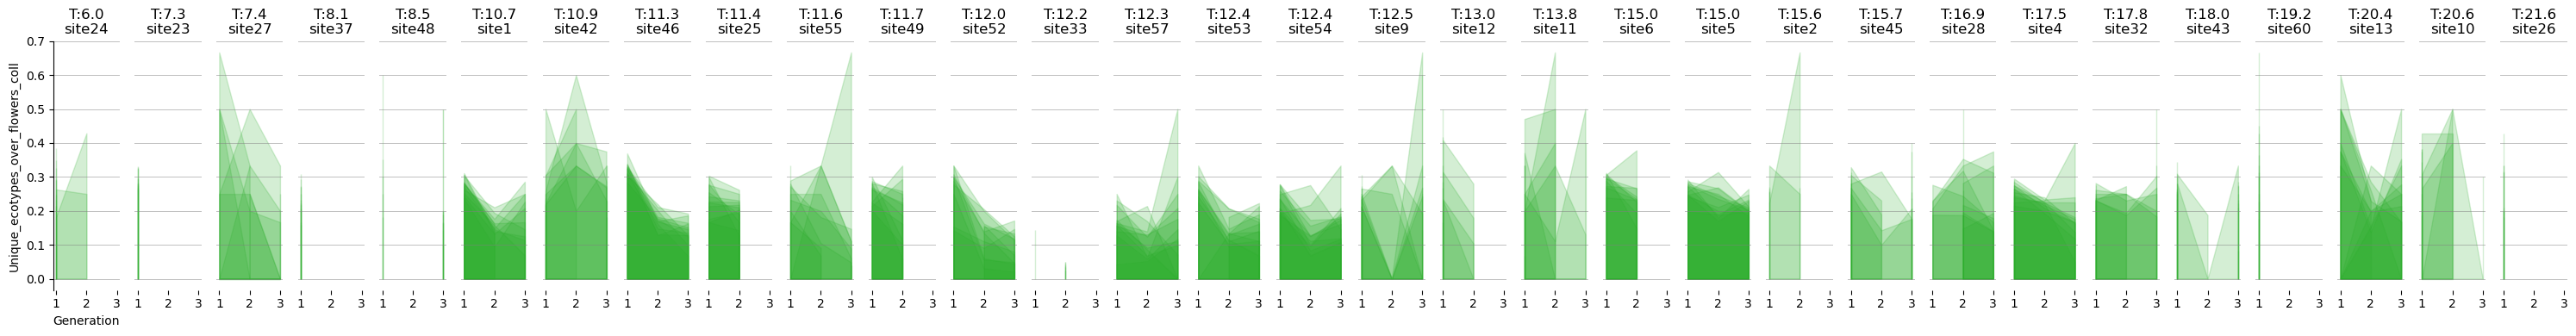

In [165]:
import matplotlib.pyplot as plt

# Set the number of columns for the plot grid
n_cols = len(bio1_groups)
n_rows = 1

# Create subplots with multiple columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes if we have multiple rows/columns
axes = axes.flatten()



# Plot each group of samples in a different subplot with color-filled areas
for i, (bio1_val, group) in enumerate(bio1_groups):
    for _, row in group.iterrows():
        x = [1, 2, 3]
        y = row[[1, 2, 3]].astype(float).values
        
        # Fill the area representing the population size
        axes[i].fill_between(x, 0, y, color=colors[0], alpha=0.2, label='Population size')

    # Set the title and labels for each subplot
    axes[i].set_title(f'T:{round(bio1_val, 1)}\nsite{int(climate_dict[bio1_val])}')
    axes[i].set_xlabel('Generation')
    axes[i].grid(axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

    # For subplots other than the first, remove y-axis labels and ticks
    if i > 0:
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].set_xlabel('') 
        axes[i].tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
    
    # Remove all spines (rectangles around the plots)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(i == 0)  # Only show the left spine for the first plot

# Set y-axis label and ticks only for the first plot
axes[0].set_ylabel('Unique_ecotypes_over_flowers_coll')
plt.subplots_adjust(wspace=0, hspace=0)  # Shrink space between subplots

#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, zorder=0)

plt.tight_layout()

# Display the plot
plt.show()

In [13]:
ecotype_freq = pd.read_csv('../key_files/merged_ecotype_frequency.txt',sep = '\t')

In [14]:
ecotype_freq

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.001811,0.002972,0.002207,0.002224,0.003074,0.003125,0.003698,0.003377,0.002642,0.003054,...,0.003659,0.000256,0.000624,0.000184,0.002196,0.002055,0.000591,0.000806,0.000442,0.003642
1,0.001071,0.001051,0.008073,0.001294,0.001269,0.001334,0.001040,0.001246,0.001428,0.009924,...,0.000774,0.039458,0.000258,0.000425,0.000258,0.001056,0.001835,0.001006,0.000412,0.000498
2,0.001294,0.000480,0.000686,0.003762,0.000684,0.000590,0.000690,0.000823,0.000884,0.000855,...,0.000130,0.000262,0.000044,0.000381,0.000348,0.000103,0.000105,0.000682,0.000000,0.000159
3,0.000633,0.000904,0.000778,0.001123,0.003116,0.000758,0.001274,0.000965,0.000845,0.001196,...,0.000538,0.000199,0.000067,0.000222,0.000105,0.002007,0.001271,0.000711,0.000329,0.000220
4,0.000470,0.003701,0.000602,0.001019,0.020989,0.000568,0.001291,0.000875,0.000778,0.001077,...,0.000544,0.000299,0.000011,0.000055,0.000243,0.014905,0.001369,0.000274,0.000269,0.000201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,0.000740,0.005775,0.000711,0.001752,0.001607,0.004514,0.003806,0.008937,0.003141,0.005110,...,0.000687,0.000584,0.000467,0.000883,0.000740,0.003744,0.014624,0.001323,0.001993,0.000467
227,0.002256,0.006301,0.002735,0.003294,0.002891,0.003263,0.003535,0.008204,0.002187,0.002397,...,0.001777,0.000376,0.000467,0.000274,0.001367,0.003442,0.000774,0.000662,0.000322,0.000692
228,0.000729,0.000928,0.000756,0.000853,0.000843,0.001579,0.000766,0.001570,0.001097,0.002119,...,0.000598,0.000548,0.000387,0.020064,0.000498,0.000717,0.001437,0.000646,0.000552,0.000684
229,0.000732,0.000727,0.000840,0.000913,0.000612,0.000719,0.000620,0.000707,0.000707,0.000781,...,0.000455,0.000657,0.000294,0.000416,0.000331,0.000520,0.000639,0.000586,0.000195,0.000362


In [15]:
def calculate_shannon_diversity(column):
    shannon_index = -np.sum(column * np.log(column))
    return shannon_index

# Now, calculating Shannon's diversity for each column
shannon_diversity_values = ecotype_freq.apply(calculate_shannon_diversity, axis=0)

/home/tbellagio/miniforge3/envs/pipeline_snakemake/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
shannon_diversity_values = shannon_diversity_values.reset_index()#.set_index()

In [17]:
shannon_diversity_values['site_plot'] = shannon_diversity_values['index'].str.split('_').str[0] + '_' +  shannon_diversity_values['index'].str.split('_').str[2]
shannon_diversity_values['generation'] = shannon_diversity_values['index'].str.split('_').str[1].astype(int)

In [18]:
shannon_diversity_values

,index,0,site_plot,generation
0,1_1_1,4.944182,1_1,1
1,1_1_2,4.953645,1_2,1
2,1_1_3,4.965374,1_3,1
3,1_1_4,5.037095,1_4,1
4,1_1_5,4.798984,1_5,1
...,...,...,...,...
740,60_1_8,3.865395,60_8,1
741,60_1_9,2.765363,60_9,1
742,60_1_10,3.368449,60_10,1
743,60_1_11,2.812852,60_11,1


In [19]:
shannon_diversity_values_pivot = shannon_diversity_values.pivot_table(index = 'site_plot', columns = 'generation', values = 0)

In [23]:
shannon_diversity_values['site'] = shannon_diversity_values['site_plot'].str.split('_').str[0].astype(int)

In [24]:
shannon_diversity_values

,index,0,site_plot,generation,site
0,1_1_1,4.944182,1_1,1,1
1,1_1_2,4.953645,1_2,1,1
2,1_1_3,4.965374,1_3,1,1
3,1_1_4,5.037095,1_4,1,1
4,1_1_5,4.798984,1_5,1,1
...,...,...,...,...,...
740,60_1_8,3.865395,60_8,1,60
741,60_1_9,2.765363,60_9,1,60
742,60_1_10,3.368449,60_10,1,60
743,60_1_11,2.812852,60_11,1,60


In [25]:
shannon_diversity_values.to_csv('../key_files/shannon_div.csv', index=None)

In [21]:
# Merge the two dataframes on the index
merged_df = shannon_diversity_values_pivot.join(bio1)

# Group by temperature (bio1)
bio1_groups = merged_df.groupby('bio1')

NameError: name 'bio1' is not defined

In [ ]:
merged_df

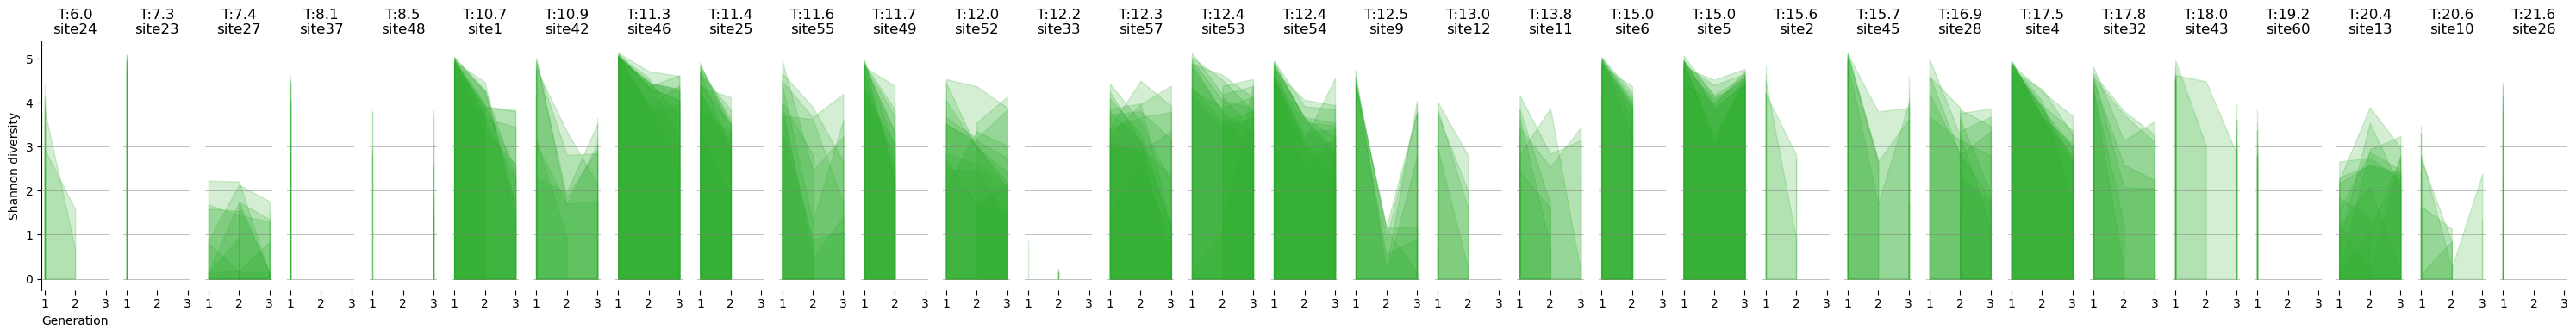

In [25]:
import matplotlib.pyplot as plt

# Set the number of columns for the plot grid
n_cols = len(bio1_groups)
n_rows = 1

# Create subplots with multiple columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30, 4 * n_rows), sharex=True, sharey=True)

# Flatten axes if we have multiple rows/columns
axes = axes.flatten()



# Plot each group of samples in a different subplot with color-filled areas
for i, (bio1_val, group) in enumerate(bio1_groups):
    for _, row in group.iterrows():
        x = [1, 2, 3]
        y = row[[1, 2, 3]].astype(float).values
        
        # Fill the area representing the population size
        axes[i].fill_between(x, 0, y, color=colors[0], alpha=0.2, label='Population size')

    # Set the title and labels for each subplot
    axes[i].set_title(f'T:{round(bio1_val, 1)}\nsite{int(climate_dict[bio1_val])}')
    axes[i].set_xlabel('Generation')
    axes[i].grid(axis='y', color='gray', linestyle='-', linewidth=0.7, alpha=0.5)

    # For subplots other than the first, remove y-axis labels and ticks
    if i > 0:
        axes[i].set_ylabel('')  # Remove y-axis label
        axes[i].set_xlabel('') 
        axes[i].tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels
    
    # Remove all spines (rectangles around the plots)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['left'].set_visible(i == 0)  # Only show the left spine for the first plot

# Set y-axis label and ticks only for the first plot
axes[0].set_ylabel('Shannon diversity')
plt.subplots_adjust(wspace=0, hspace=0)  # Shrink space between subplots

#plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7, zorder=0)

plt.tight_layout()
plt.savefig('shanon_diversity_sites_time.png')

# Display the plot
plt.show()